### Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

sample_submission = pd.read_csv('datasets/house-prices-advanced-regression-techniques/sample_submission.csv')
display(sample_submission.head())

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


### Reading the data

In [8]:
train_df = pd.read_csv('datasets/house-prices-advanced-regression-techniques/train.csv')
print(train_df.shape)
display(train_df.head())

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EAD's

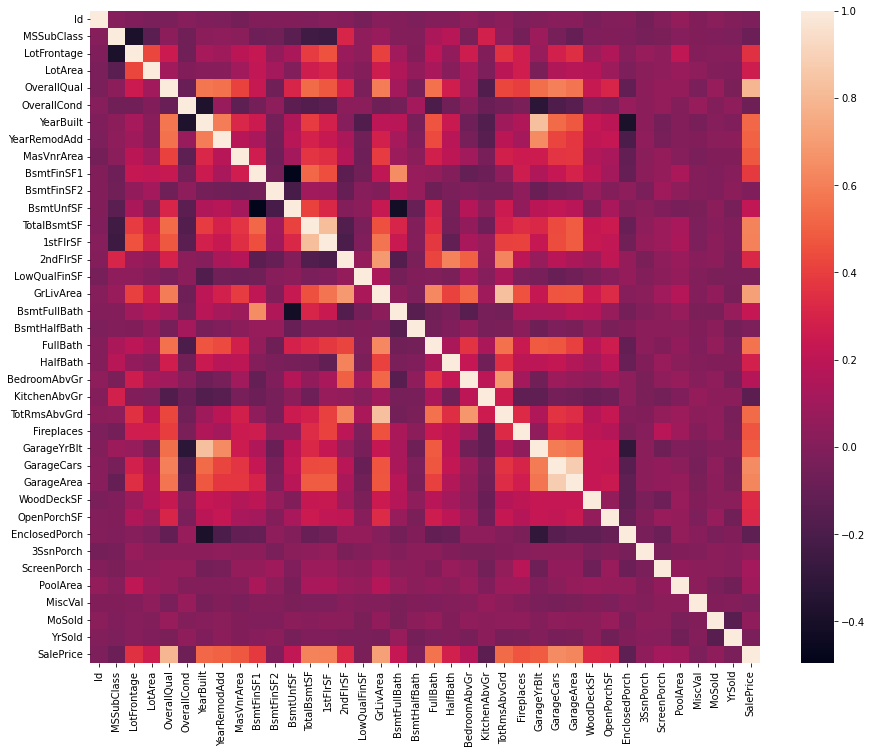

In [6]:
plt.figure(figsize=[15, 12])
sns.heatmap(train_df.corr())
plt.show()

In [34]:
test_df = pd.read_csv('datasets/house-prices-advanced-regression-techniques/test.csv')
display(test_df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [35]:
from sklearn.model_selection import train_test_split
X_train, x_test = train_test_split(train_df, test_size=0.2, random_state=42)

YY = train_df.to_numpy()[:, -1]
Y = X_train.to_numpy()[:, -1]
y = x_test.to_numpy()[:, -1]

# X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Deviding into 80, 20 


### The Sub

In [20]:
train_df_sub = X_train[['LotShape','SaleCondition', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'MasVnrType', 'Foundation', 'Electrical', 'Heating', 'GarageType', 'LotArea','MSSubClass','OverallQual','GrLivArea','KitchenAbvGr','EnclosedPorch','GarageCars','GarageArea','MiscVal','MoSold','YearBuilt','YrSold', 'FullBath','HalfBath','Fireplaces']]
print(train_df_sub.shape)

(1168, 27)


### Dealing with Categorical Values

In [21]:
train_df_cat = train_df_sub[['LotShape','SaleCondition', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'MasVnrType', 'Foundation', 'Electrical', 'Heating', 'GarageType']]
# train_df_cat = train_df_cat.fillna(train_df_cat.mode())
# train_df_cat.isnull().sum()
# display(train_df_cat.info())
train_df_cat.shape

(1168, 12)

### Numeric Values

In [22]:
train_df_nu = deepcopy(train_df_sub[['LotArea','MSSubClass','OverallQual','GrLivArea','KitchenAbvGr','EnclosedPorch','GarageCars','GarageArea','MiscVal','MoSold','YearBuilt','YrSold','FullBath','HalfBath','Fireplaces']])
# display(train_df_nu.info())
train_df_nu.shape

(1168, 15)

### Pipeline's

In [31]:
cat_attribs = ['LotShape','SaleCondition', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'MasVnrType', 'Foundation', 'Electrical', 'Heating', 'GarageType']
train_df_num = list(train_df_nu)


### Custom Transformers

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# from sklearn.base import BaseEstimator, TransformerMixin

In [52]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),# Clean the Data and Filling the miss value with 'mean' imputer is the object declearing using SimpleImputer Class
    ('std_scaler', StandardScaler())
])

# display(X_train)
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, train_df_num), # For Transforming the Numerical Data
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)
], remainder='drop')

train_df_prepared = full_pipeline.fit_transform(X_train)

print(train_df_prepared.shape)
# print(final_train_df_prepared.shape)

(1168, 103)


## Fitting the Model

In [ ]:
X_test = full_pipeline.transform(x_test)
print(X_test.shape)

### linear Equation

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(train_df_prepared, Y)

### Linear Prediction

In [ ]:
## Making Prediction
linear_prediction = linear.predict(X_test)

### Calculating Losses for Linear Model

#### Usefull function

In [ ]:
def display_score(score):
    print('mean Score: ', score.mean())
    print('std: ', score.std())

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

linear_loss = mean_squared_error(y, linear_prediction)
print(np.sqrt(linear_loss))

linear_scores = cross_val_score(linear, train_df_prepared, Y, scoring='neg_mean_squared_error', cv=10)
score = np.sqrt(-linear_scores)
display_score(score)



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(train_df_prepared, Y)

In [ ]:
forest_prediction = forest.predict(X_test)

### Calculating Losses for Random Forest Model

In [ ]:
forest_loss = mean_squared_error(y, forest_prediction)
print(np.sqrt(forest_loss))

forest_scores = cross_val_score(forest, train_df_prepared, Y, scoring='neg_mean_squared_error', cv=10)
score = np.sqrt(-forest_scores)
display_score(score)

### Making the Predictions

### Preparing for Submit

In [ ]:
# A last coress
forest_scores_final = cross_val_score(forest, final_train_df_prepared, YY, scoring='neg_mean_squared_error', cv=10)
score = np.sqrt(-forest_scores_final)
display_score(score)

In [ ]:
# Preprocessing
final_train_df_prepared = full_pipeline.transform(train_df)
final_train_df_prepared.shape

In [ ]:
# Fitting the Model
forest.fit(final_train_df_prepared, YY)

In [ ]:
# Preprocessing test set
final_test = full_pipeline.fit_transform(test_df)
final_test.shape

In [ ]:
# Predict
prediction = forest.predict(final_test)

In [ ]:
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': prediction})
output.to_csv('submint_forest.csv', index=False)
print("Successfull!")